# What sells a car?


The purpose of this project is to determine which factors, if any, influence the price of a vehicle listed on a car ad. The steps I will take are:
- Taking a precursory look at the data to get familiar with its structure and features
- Determine if there are missing values, and if there are missing values, determine if and how to fill them
- Take a look at the data types and ensure they are what I need to continue
- Analyze the different parameters of the dataset individually to determine if any adjustments need to be made i.e. removing outliers
- Check if there is a significant correlation between these parameters and the price of a vehicle.



## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
# Load the data file into a DataFrame
data= pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# print the general/summary information about the DataFrame
print(data.describe())
print(data.info())



               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column      

In [4]:
# print a sample of data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In taking a look at the dataset I noticed:
- There are currently 51,525 ads 
- Date posted will have to be converted to date time
- There are missing values in model year, cylinders, odometer, paint color, and 4wd. 

4wd is missnig the most values but as it is a Boolean value, this will be easily remedied and I will fill in the missing values with 0, indicating the car does not have 4wd. 
Follwing 4wd, paint color is missing the most values and then odometer. 

### Conclusions and further steps



Interesting observations: There is a price as low as a dollar, there is a day listed entry as 0 days with the longest being 271 days. I'm not sure that a price of a dollar is normal but I will analyze further.

Next steps: changing the data type of day posted and filling in the missing values of is 4wd and analyzing whether to fill in the missing values for odometer, paint color, cylinder, and model year. 

## Treating missing values (if any)

### Filling in 4wd ###
As 4wd is Boolean value which means the resuls can either be a 1 or 0, I will fill in missing values with 0.

In [5]:
data['is_4wd'].fillna(0, inplace=True)

In [6]:
data['is_4wd'].isna().sum()

0

In [7]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Next steps: Because we will later on be finding the vehicle age and the avg mile per age the model year and odometer columns need to be filled in. 

### Filling In Odometer ###

In [8]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

The mean and median values are quite different so I will be using the median. However, a car's odometer is typically affected by its model year and the condition of the car as well. First I will group the data into model year and condition and then take the median of these groups to fill in the missing values.

In [9]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


I will save my process to a variable so the code runs faster.

In [10]:
fill_odo_var = data.groupby(['model_year', 'condition'])['odometer'].median()

I will create a variable that groups the data by model year and condition and then finds the median value of mileage (odometer) of these groups. 
I will create function that takes this variable and applies it to a row if that row's odometer value is missing.

In [11]:
def fill_odo(row):
    if np.isnan(row['odometer']):
        return fill_odo_var.get((row['model_year'], row['condition']))
    else:
        return row['odometer']

In [12]:
data['odometer'] = data.apply(fill_odo, axis=1)

In [13]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      50969 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Filling in Model Year ###
Our odometer rows are not completely filled but I believe this wil suffice. Next we move onto model year. It may be possible to guess a car's model year based on the model and mileage on the car or possibly the condition of the car. Because odometer is a numerical value with a large range, we will go with condiiton instead. We  will be using similar coding to the above, once again finding the median.

In [15]:
data['model_year'].isna().sum()

3619

In [16]:
fill_model_year_var= data.groupby(['model', 'condition'])['model_year'].median()

In [17]:
def fill_model_year(row):
    if np.isnan(row['model_year']):
        return fill_model_year_var.get((row['model'], row['condition']))
    else:
        return row['model_year']

In [18]:
data['model_year'] = data.apply(fill_model_year, axis=1)

In [19]:
print(data['model_year'].isna().sum())
print(data.head())
print(data.info())

6
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2008.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas  193850.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     0.0  2019-02-07           79  
3    automatic  pickup         NaN     0.0  2019-03-22            9  
4    automatic   sedan       black     0.0  2019-04-02           28  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   C

In [20]:
data['model_year'].count()/data.shape[0]

0.9998835516739447

This is did not fill all of the missing values but it filled in the majority with only 6 values missing or less than 0.01%.

### Filling In Number of Cylinders ###


In [21]:
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

The mean and the median are very similar at 6.125 and 6 respectively, but with the min being 3 and the max being 12, I feel as if the going with the median would be best. 
Also going with the median will insure we won't get a decimal as a cylinder count. 
I believe a possible estimate of a car's number of cylinders can be reached by considering the car's model and model year. Once again we will be using similar coding to the above.

In [22]:
fill_cylin_var = data.groupby(['model', 'model_year'])['cylinders'].median()

In [23]:
def fill_cylinders(row):
    if np.isnan(row['cylinders']):
        return fill_cylin_var.get((row['model'], row['model_year']))
    else:
        return row['cylinders']

In [24]:
data['cylinders'] = data.apply(fill_cylinders, axis=1)

In [25]:
print(data['cylinders'].isna().sum())
print(data['cylinders'].isna().sum()/data.shape[0])

30
0.0005822416302765648


We were able to fill in many of the cylinder rows leaving only less than 0.5% of the cylinder column being empty.

I will not be filling in paint color as the possibilities of what paint color a car may be is vast and would be difficult to narrow down. 

As days listed is not a core parameter I plan on analyzing when determining what influence's a car's price, I will not be filling in those missing values.

## Fix data types

Now that my initial data preprocessing is complete, I will be converting the date_posted column into a date time type.

In [26]:
data['date_posted']=pd.to_datetime(data['date_posted'], format='%Y/%m/%d')

## Enrich data

I will add a few more columns that may help with my analysis:
- The day the add was placed
- The month the add was placed
- the year the ad was placed

The above will help me determine and create columns that detail
- The age of the vehicle when the ad was placed
- The average number of miles per age of a vehicle 

Finally I will replace the condition column with integers to make it easier to work with when it comes to artithmetic operations. 

In [27]:
# Add datetime values for when the ad was placed
#day the add was placed
data['day']=data['date_posted'].dt.weekday

In [28]:
#month the ad was placed
data['month']=data['date_posted'].dt.month

In [29]:
#year the ad was placed 
data['year']=data['date_posted'].dt.year

In [30]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019


In [31]:
# Add the vehicle's age when the ad was placed
data['vehicle_age']= data['year'] - data['model_year']


In [32]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,10.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0


In [33]:
# Add the vehicle's average mileage per year
data['avg_mile']= data['odometer']/ data['vehicle_age']


In [34]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mile
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000


In [35]:
# Replacing the condition values with something that can be manipulated more easily

def replace_condition(value):
    if value == 'new':
        return 5
    if value == 'like new':
        return 4
    if value == 'excellent':
        return 3
    if value == 'good':
        return 2
    if value =='fair':
        return 1
    if value =='salvage':
        return 0



In [36]:
data['condition']= data['condition'].apply(replace_condition)
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5          2        6.0  gas  145000.0   
1  25500      2008.0      ford f-150          2        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata          4        4.0  gas  110000.0   
3   1500      2003.0      ford f-150          1        8.0  gas  193850.0   
4  14900      2017.0    chrysler 200          3        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  day  \
0    automatic     SUV         NaN     1.0  2018-06-23           19    5   
1    automatic  pickup       white     1.0  2018-10-19           50    4   
2    automatic   sedan         red     0.0  2019-02-07           79    3   
3    automatic  pickup         NaN     0.0  2019-03-22            9    4   
4    automatic   sedan       black     0.0  2019-04-02           28    1   

   month  year  vehicle_age      avg_mile  
0      6  2018          7.0  20714.2

## Check clean data

Now that I am satisifed with the current status of my data I will take a general look at it once more before studying the core parameters.

In [37]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51519 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51495 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50969 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day           51525 non-null  int64         
 14  month         51525 non-null  int64         
 15  year          51525 non-null  int64 

In [38]:
# print a sample of data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mile
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000


## Study core parameters

I will create histograms and, if needed, boxplots of each of the parameters to check for any outliers or skewness.

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

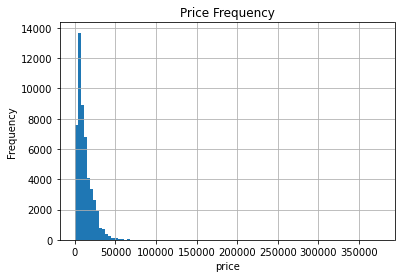

In [83]:

data['price'].plot(kind='hist', bins=100, title='Price Frequency', grid=True)
plt.xlabel('price')
plt.show()


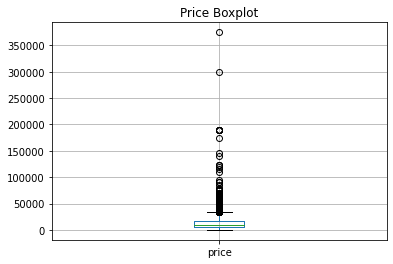

In [84]:
data.boxplot('price')
plt.title('Price Boxplot')
plt.show()

The price column has outliers, that are readily seen in the boxplot. These outliers are making the histogram skewed and harder to read. It may become necessary to remove these outliers.

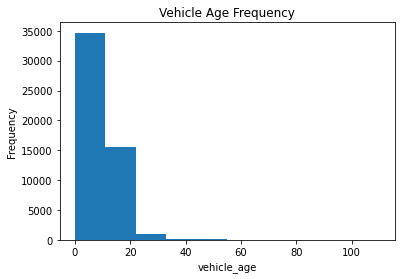

In [41]:
data['vehicle_age'].plot(kind='hist', bins=10, title='Vehicle Age Frequency')
plt.xlabel('vehicle_age')
plt.show()

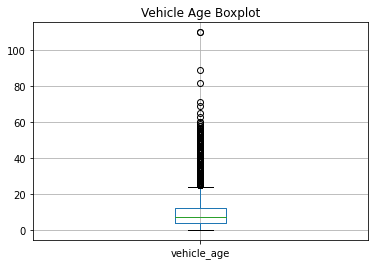

In [85]:
data.boxplot('vehicle_age')
plt.title('Vehicle Age Boxplot')
plt.show()

Similar to the price historgram, the vehicle age histogram is hard to read due to many outliers above vehicle age upper whisker (as seen in box plot).

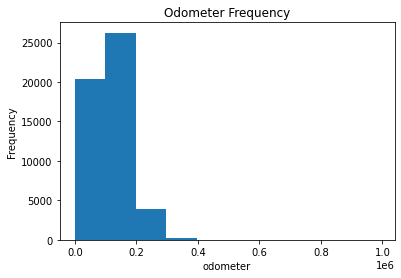

In [43]:
data['odometer'].plot(kind='hist', bins=10, title='Odometer Frequency')
plt.xlabel('odometer')
plt.show()

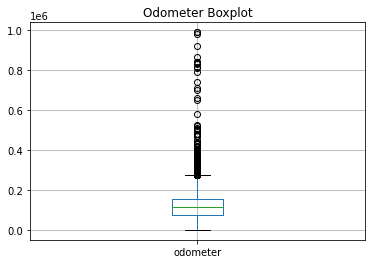

In [86]:
data.boxplot('odometer')
plt.title('Odometer Boxplot')
plt.show()

The odometer hitogram also has many outliers that are affecting the readability of its histogram.

In [45]:
condition_bar_data = data['condition'].value_counts()


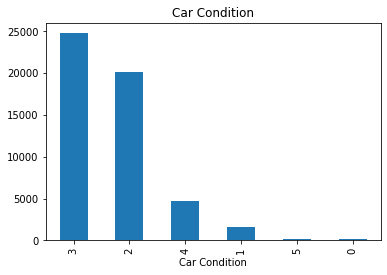

In [46]:
condition_bar_data.plot(kind='bar', title= 'Car Condition')
plt.xlabel('Car Condition')
plt.show()

The majority of the cars have a 3 or 'good' condition, followed by a 2 or 'fair' condition.

In [47]:
cylin_bar_data = data['cylinders'].value_counts()

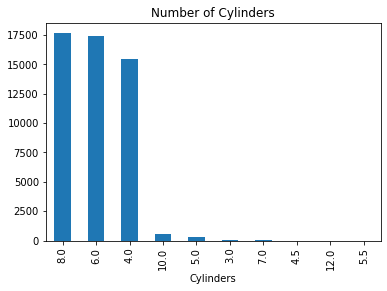

In [48]:


cylin_bar_data.plot(kind='bar', title='Number of Cylinders')
plt.xlabel('Cylinders')
plt.show()

Looks like the majority of the cars have 8 or 6 cylinders with a small minority having less than 4 or more than 8.

Final thoughts: The condition and cylinder histograms are easy to read but the mileage, vehicle age, and price will need to be adjusted due to outliers.



## Study and treat outliers

I will consider values that follow below or above the theoretical upper and lower whiskers of a box plot as outliers. 
I will then create a dataset that does not contain these outliers.

I will write a loop that will go through the price, odometer, and vehicle age columns and determine there Q1 and Q3 values.

In [49]:
columns = ['price', 'odometer', 'vehicle_age']
for variable in columns:
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR= Q3- Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5* IQR
print ('The lower limit is:\n',lower_limit,
       '\n\nThe upper limit is:\n',upper_limit)
       



The lower limit is:
 price         -12758.5
odometer      -47492.5
vehicle_age       -8.0
dtype: float64 

The upper limit is:
 price           34597.5
odometer       273295.5
vehicle_age        24.0
dtype: float64


In [50]:
# Reviewer's code

columns = ['price', 'odometer', 'vehicle_age']
for variable in columns:
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR= Q3- Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5* IQR
print(
    'The lower limit is:\n',lower_limit,
    '\n\nThe upper limit is:\n',upper_limit
)

The lower limit is:
 price         -12758.5
odometer      -47492.5
vehicle_age       -8.0
dtype: float64 

The upper limit is:
 price           34597.5
odometer       273295.5
vehicle_age        24.0
dtype: float64


The theoreotical lower limits aren't actually realistic as the lowest an odometer, vehicle age, or price can go is 0, but seeing how all of our outliers can be determined by our upper limits, this is fine. 

In [51]:
# Store data without outliers in a separate DataFrame
filtered_data = data.query('price <= 34597.5 and odometer <= 273295.5 and vehicle_age <= 24 and vehicle_age >0')


## Study core parameters without outliers

Below are histograms of the now filtered data's price, odometer, and vehicle age columns as compared with the older data set's histograms.

<AxesSubplot:>

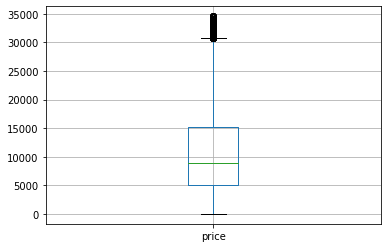

In [52]:
filtered_data.boxplot('price')

As there are still quite a few numbers of outliers shown in the boxplot, I will tweak my query code line.

In [53]:
filtered_data = data.query('price <= 30000 and odometer <= 273295.5 and vehicle_age <= 24 and vehicle_age >0')


<AxesSubplot:>

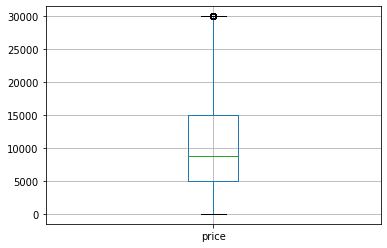

In [54]:
filtered_data.boxplot('price')

AxesSubplot(0.125,0.125;0.775x0.755)


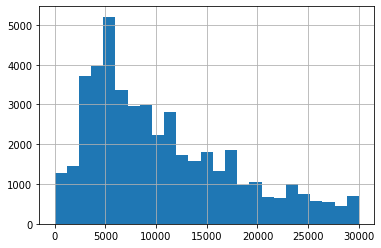

In [55]:
print(filtered_data['price'].hist(bins=25))


AxesSubplot(0.125,0.125;0.775x0.755)


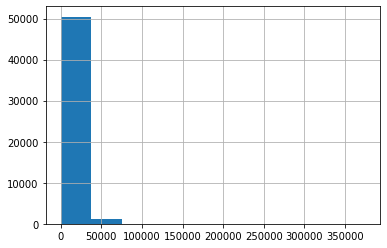

In [56]:
print(data['price'].hist())

<AxesSubplot:>

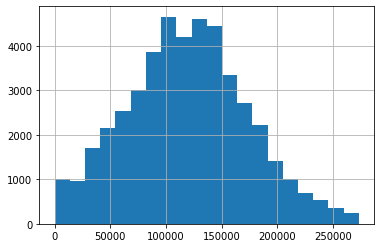

In [57]:
filtered_data['odometer'].hist(bins=20)

<AxesSubplot:>

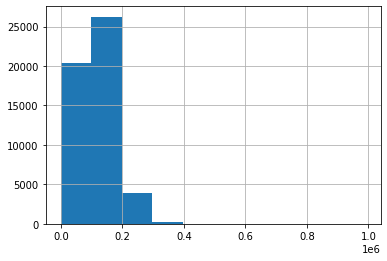

In [58]:
data['odometer'].hist()

<AxesSubplot:>

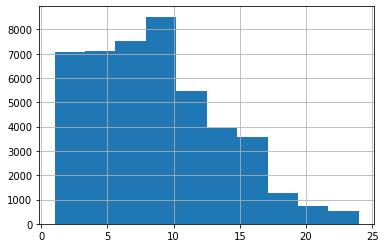

In [59]:
filtered_data['vehicle_age'].hist()

<AxesSubplot:>

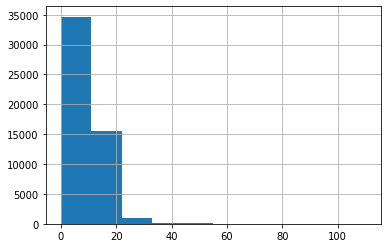

In [60]:
data['vehicle_age'].hist()

As seen above the new histograms of price,vehicle age, and mileage that have the outliers filtered give much more information. I can now see that most prices are around 5000 dollars, that odometer values peak 100,000 miles and most vehicles are between three and five years old.

## Ads lifetime

Now I am interested in the general lifetime of a car ad. I will analyze the days listed column to determine the mean and median number of days of a car add and when a car ad was removed quickly or remained listed for a longer time than that would be deemed normal. 


In [61]:
filtered_data['days_listed'].describe()

count    45701.000000
mean        39.536181
std         28.191601
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

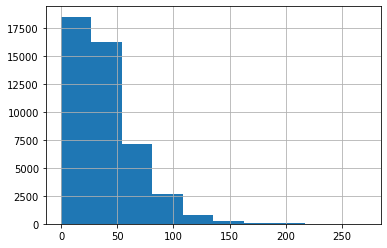

In [62]:
filtered_data['days_listed'].hist()

<AxesSubplot:>

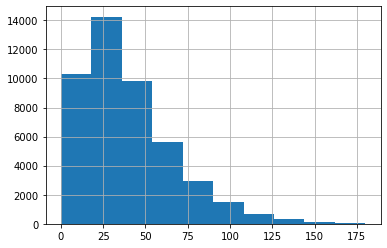

In [63]:
filtered_data['days_listed'].hist(range=(0,180))

In [64]:
len(filtered_data.query('days_listed < 19'))

11148

In [65]:
len(filtered_data.query('days_listed < 1'))

48

In [66]:
len(filtered_data.query('days_listed > 125'))

597

The mean number of days for a car ad is 35.53 days and the median is 33 days. 25% of the data falls below 19 days and there are 10,971 ads where the ads were listed for shorter than 19 days. There is also 46 ads that were listed for less than a day. 
25% of the filtered data is above 53 days and there are 586 ads which listed for longer than 125 days with the max being 271 days.

## Average price per each type of vehicle

Next I will determine the number of ads and the average price for each type of vehicle. I will then plot a graph that shows the dependence of the number of ads on the vehicle type.



In [67]:
# number of ads per vehicle type
ad_number = filtered_data['type'].value_counts()
print(ad_number)

sedan          11522
SUV            11344
truck          10406
pickup          5676
coupe           1914
wagon           1468
mini-van        1101
hatchback        971
van              551
convertible      329
other            219
offroad          177
bus               23
Name: type, dtype: int64


In [68]:
#average price for each type of vehicle
filtered_data.pivot_table(index='type', values='price').sort_values(by='price')

,price
type,
hatchback,6699.642636
sedan,6787.580976
mini-van,7716.135332
van,8185.989111
wagon,8828.619210
other,9802.292237
SUV,10049.981752
convertible,12439.607903
coupe,12910.271160


<AxesSubplot:>

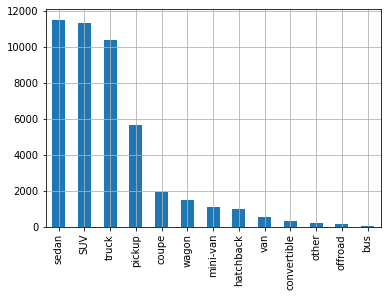

In [69]:
ad_number.plot(kind='bar', grid=True,)

In [70]:
filtered_data.query('avg_mile == inf')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mile


The two types of vehicles with the greatest number of ads is sedans and SUV's. We will focus on these types of vehicles.

## Price factors

Focusing on SUV's and sedans, let's analyze whether there is a correlation between price and the following:
- vehicle age
- mileage
- condition
- transmission type
- paint color

We will be using a correlation matrix for our quantitative columns and box and whisker plots for our categorical columns.

In [71]:
sedan_tbl = filtered_data[filtered_data['type']=='sedan']
sedan_tbl= sedan_tbl.iloc[:,[0,3,6,16]]
print(sedan_tbl)


       price  condition  odometer  vehicle_age
2       5500          4  110000.0          6.0
4      14900          3   80903.0          2.0
5      14990          3   57954.0          4.0
6      12990          3   79212.0          3.0
11      8990          3  111142.0          7.0
...      ...        ...       ...          ...
51520   9249          4   88136.0          5.0
51521   2700          0  181500.0         16.0
51522   3950          3  128000.0          9.0
51523   7455          2  139573.0          5.0
51524   6300          2   93440.5          4.0

[11522 rows x 4 columns]


In [72]:
sedan_tbl.corr()

,price,condition,odometer,vehicle_age
price,1.000000,0.283911,-0.570690,-0.635039
condition,0.283911,1.000000,-0.318398,-0.293043
odometer,-0.570690,-0.318398,1.000000,0.591150
vehicle_age,-0.635039,-0.293043,0.591150,1.000000


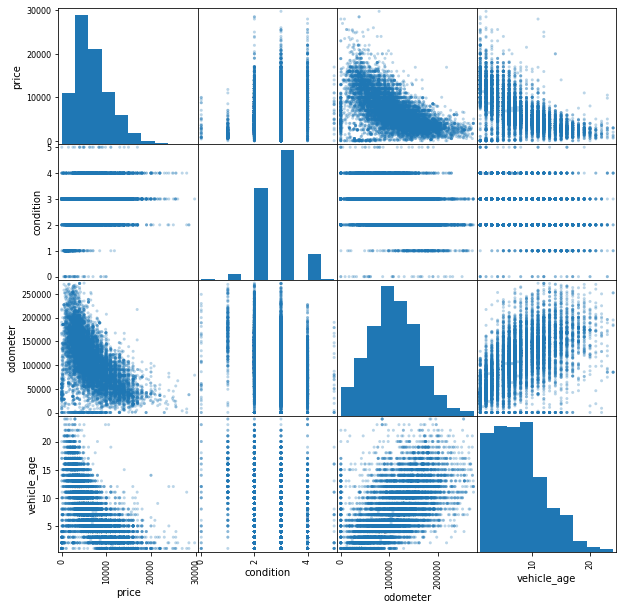

In [88]:
pd.plotting.scatter_matrix(sedan_tbl, alpha=(0.3),figsize=(10,10))
plt.show()

In [74]:
sedan_tbl_cat = filtered_data[filtered_data['type']=='sedan']
sedan_tbl_cat=sedan_tbl_cat.iloc[:,[0,7,9]]
print(sedan_tbl_cat.head())


    price transmission paint_color
2    5500    automatic         red
4   14900    automatic       black
5   14990    automatic       black
6   12990    automatic       white
11   8990    automatic        grey


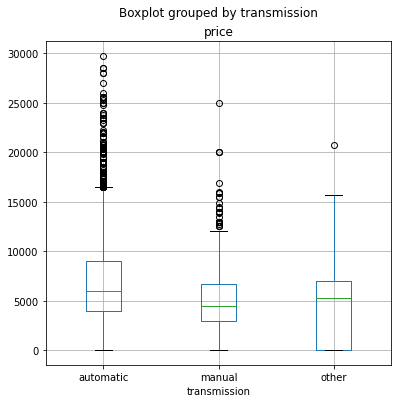

In [89]:
sedan_tbl_cat.boxplot(column='price', by='transmission',figsize=(6,6), grid=True)
plt.show()

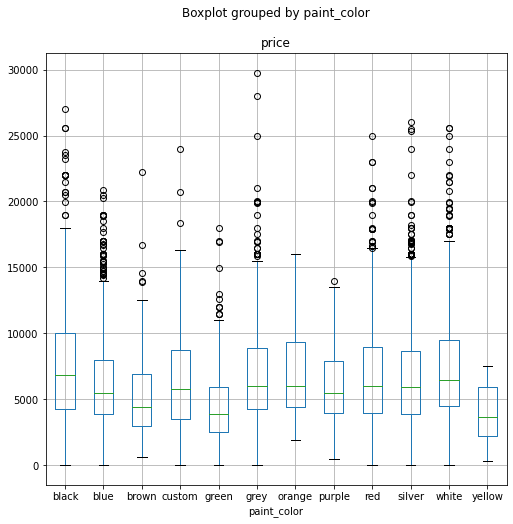

In [90]:
sedan_tbl_cat.boxplot(column='price', by='paint_color',figsize=(8,8), grid=True)
plt.show()

Sedan findings: The most correlation can be found with vehicle age and price with a negative correlation of about .648, it not an overwhelming correlation but it is not the highest, followed by a slight negative correlation between price and mileage at 0.571.

Among the categorical variables: for transmission type, the highest median price and highest outliers lie with automatic transmission. For paint color greatest median price is the color orange, with the  greatest variance among white, yellow and black.

Now we focus on SUV's.

In [77]:
suv_tbl = filtered_data[filtered_data['type']=='SUV']
suv_tbl= suv_tbl.iloc[:,[0,3,6,16]]
print(sedan_tbl.head())

    price  condition  odometer  vehicle_age
2    5500          4  110000.0          6.0
4   14900          3   80903.0          2.0
5   14990          3   57954.0          4.0
6   12990          3   79212.0          3.0
11   8990          3  111142.0          7.0


In [78]:
suv_tbl.corr()

,price,condition,odometer,vehicle_age
price,1.000000,0.266354,-0.540520,-0.606905
condition,0.266354,1.000000,-0.321251,-0.313908
odometer,-0.540520,-0.321251,1.000000,0.591059
vehicle_age,-0.606905,-0.313908,0.591059,1.000000


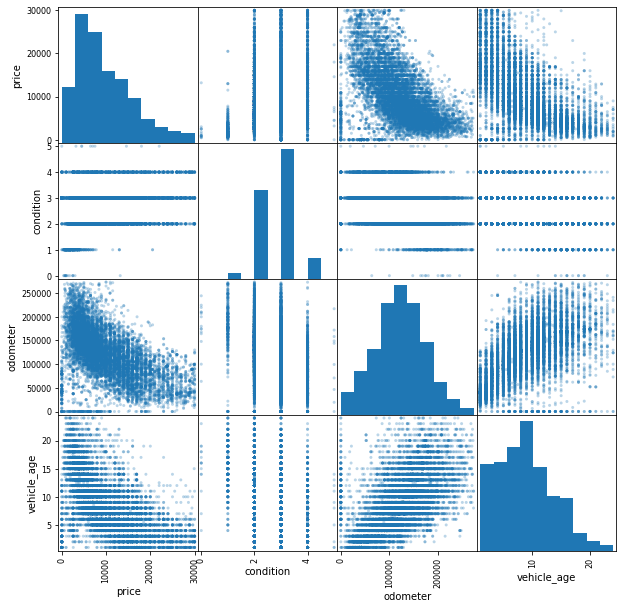

In [91]:
pd.plotting.scatter_matrix(suv_tbl, alpha=(0.3),figsize=(10,10))
plt.show()

In [80]:
suv_tbl_cat = filtered_data[filtered_data['type']=='SUV']
suv_tbl_cat= suv_tbl_cat.iloc[:,[0,7,9]]
print(suv_tbl_cat.head())

    price transmission paint_color
0    9400    automatic         NaN
7   15990    automatic       black
8   11500    automatic         NaN
9    9200    automatic        blue
14  12990    automatic       black


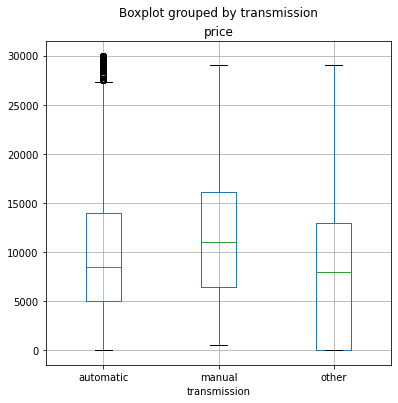

In [92]:
suv_tbl_cat.boxplot(column='price', by='transmission',figsize=(6,6), grid=True)
plt.show()

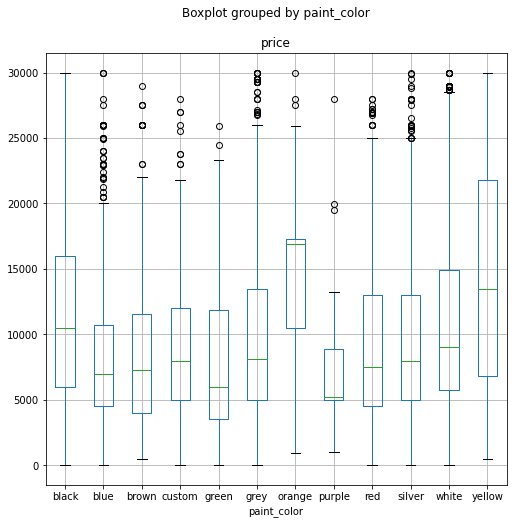

In [93]:
suv_tbl_cat.boxplot(column='price', by='paint_color',figsize=(8,8), grid=True)
plt.show()

SUV's show a same correlation between the parameters and price as seen in sedans. 
The highest correlation is between price and vehicle age at about -0.624, followed by odometer/mileage at -0.545. Similarly to sedans, these are not very high correlations.

Looking at the categorical variables, the median price for the color orange is highest with a median that is the same as it's Q3. 
One difference between SUV's and sedan's is that for SUV's the highest price is found in SUV's with manual transmission whereas with sedan's it was found with cars that have automatic transmissions.

## General conclusion


The goal of this project was to figure out what affects the price listed on car ads. Our initial foray into the data resulting in the need to change data types and fill in missing values in the model year, odometer, and cylinder columns.. Then we added some columns to the data for more efficient data analysis (vehicle age when the ad was listed and the average number of miles vehicle age. After we cleaned the data we ran histograms and then removed outliers that were skewing the results and affecting the readability of the histogram. Once I was satisfied with the new data then I analyzed the core parameters: price, milege, vehicle age, transmission type, and paint color on the 2 vehicle types with the most ads, SUV's and sedans. 

When studying the correlation of these parameters with price, there wasn't an overwhelming obvious correlation wth a negative correlation. I found:


For Sedans:

- a negative correlation of -0.648 between price and vehicle age
- a slight negative correlation of -0.571 between price and odometer.
- the median price was higher for sedans with an automatic transmission and painted the color orange


For SUV's:

- a negative correlation of -0.624 between price and vehicle age
- a slight negative correlation of -0.545 between price and odometer.
- the median price was higher for SUV's with a manual transmission and painted the color orange.